In [1]:
import json
from chatsky_llm_autoconfig.graph import Graph
from chatsky_llm_autoconfig.dialogue import Dialogue

: 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
with open('experiments/2024.11.27_triplet_check_impovement\generated_datasets_one_utter/valid_dialogues_with_samples.json', encoding="utf-8") as f:
    data = json.load(f)

In [4]:
graph_dict = data[0]['graph']
graph_dict.get("nodes")

[{'id': 1,
  'label': 'welcome',
  'is_start': True,
  'utterances': ['Welcome to Sky Travel! How can I assist you with your travel plans today?']},
 {'id': 2,
  'label': 'ask_route',
  'is_start': False,
  'utterances': ['Where are you flying from and to?']},
 {'id': 3,
  'label': 'ask_date',
  'is_start': False,
  'utterances': ['What date would you like to fly?']},
 {'id': 4,
  'label': 'ask_class',
  'is_start': False,
  'utterances': ['Which class would you prefer: Economy, Business, or First?']},
 {'id': 5,
  'label': 'ask_frequent_flyer',
  'is_start': False,
  'utterances': ["Do you have a frequent flyer number you'd like to use?"]},
 {'id': 6,
  'label': 'confirm_booking',
  'is_start': False,
  'utterances': ['Great! Shall I proceed with booking your flight?']},
 {'id': 7,
  'label': 'complete',
  'is_start': False,
  'utterances': ['Your flight is booked! Would you like to book another flight or need help with anything else?']}]

In [5]:
starts = [n for n in graph_dict.get("nodes") if n["is_start"]]
starts

[{'id': 1,
  'label': 'welcome',
  'is_start': True,
  'utterances': ['Welcome to Sky Travel! How can I assist you with your travel plans today?']}]

In [6]:
gr = Graph(graph_dict=graph_dict)

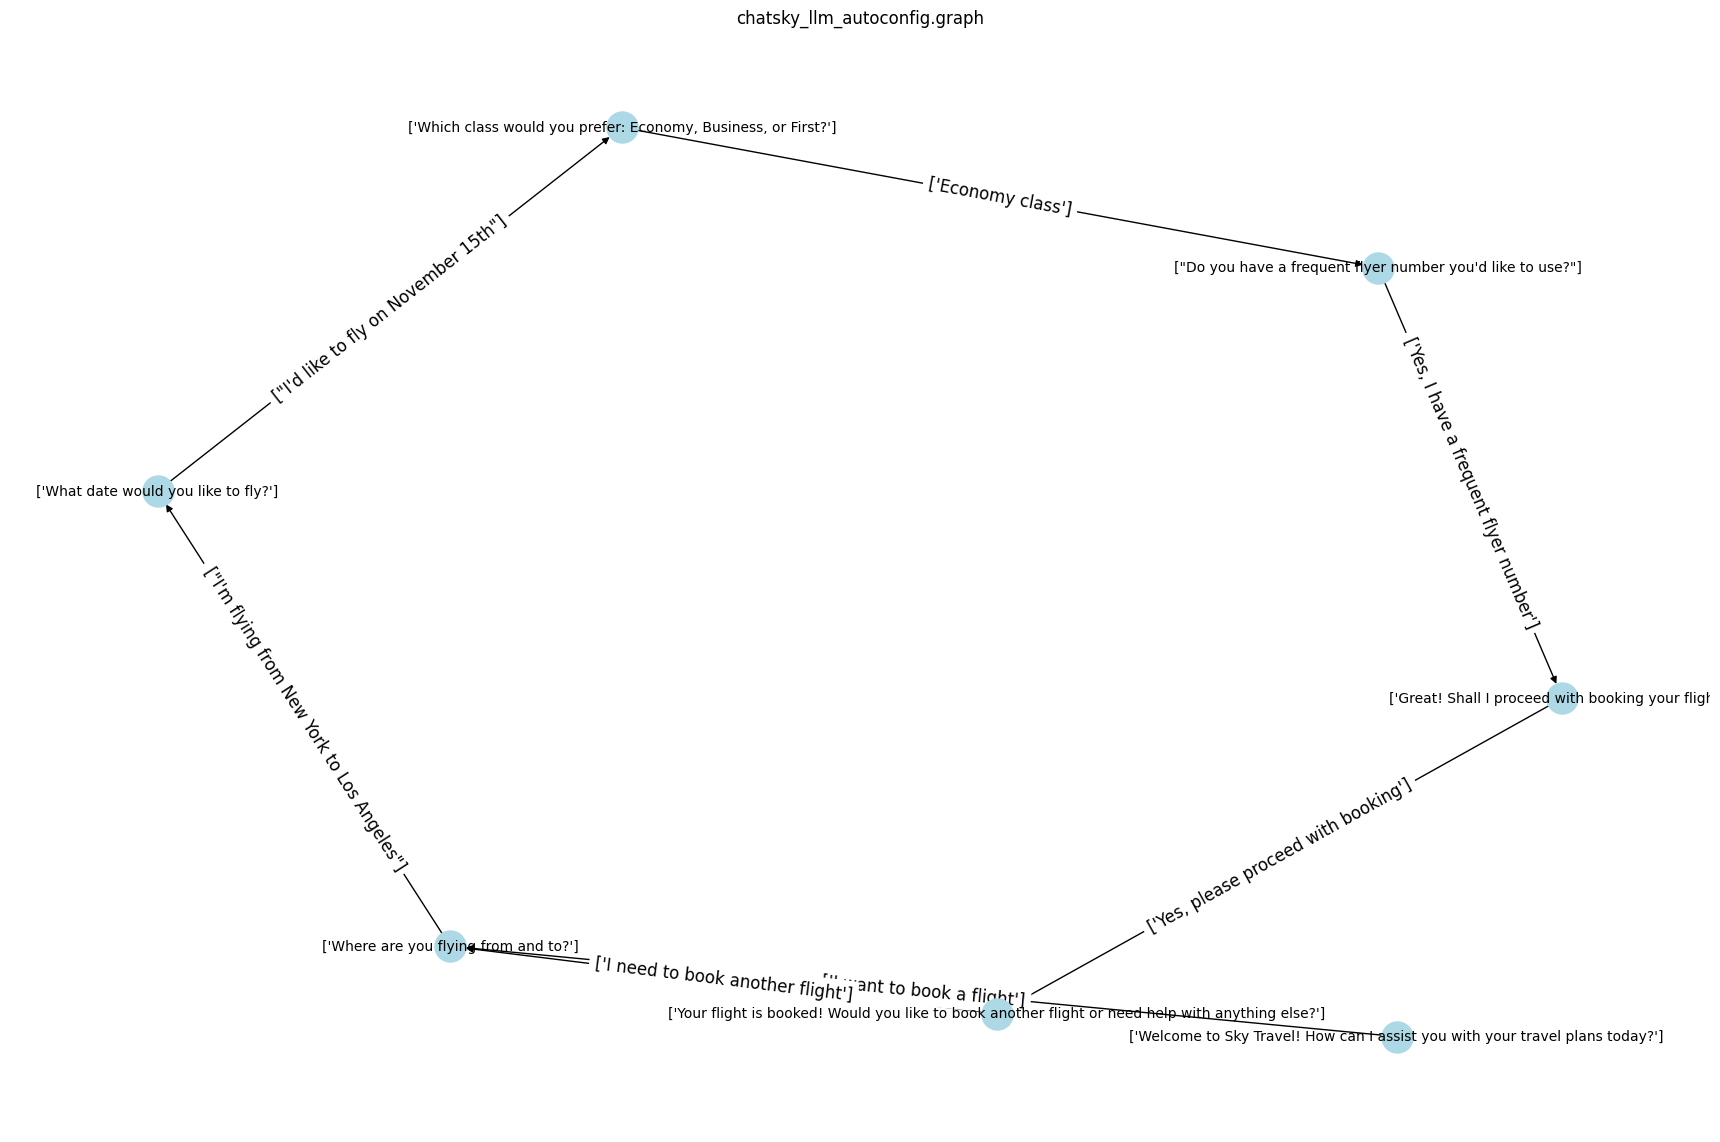

In [7]:
gr.visualise()

In [8]:
def list_in(a, b):
    return any(map(lambda x: b[x:x + len(a)] == a, range(len(b) - len(a) + 1)))

In [9]:
visitedList = [[]]

def all_paths(graph: Graph, start: int, visited: list):
    print("start: ", start, len(visitedList))
    if len(visited) < 2 or not list_in(visited[-2:]+[start],visited):
        visited.append(start)
        print("visited:", visited)
        for edge in graph.edge_by_source(start):

        # if [start,edge['target']] not in visited:           
            all_paths(graph, edge['target'], visited.copy())
    visitedList.append(visited)

In [10]:
all_paths(gr, starts[0]['id'], [])

print(visitedList)

start:  1 1
visited: [1]
start:  2 1
visited: [1, 2]
start:  3 1
visited: [1, 2, 3]
start:  4 1
visited: [1, 2, 3, 4]
start:  5 1
visited: [1, 2, 3, 4, 5]
start:  6 1
visited: [1, 2, 3, 4, 5, 6]
start:  7 1
visited: [1, 2, 3, 4, 5, 6, 7]
start:  2 1
visited: [1, 2, 3, 4, 5, 6, 7, 2]
start:  3 1
visited: [1, 2, 3, 4, 5, 6, 7, 2, 3]
start:  4 1
[[], [1, 2, 3, 4, 5, 6, 7, 2, 3], [1, 2, 3, 4, 5, 6, 7, 2, 3], [1, 2, 3, 4, 5, 6, 7, 2], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5], [1, 2, 3, 4], [1, 2, 3], [1, 2], [1]]


In [16]:
import itertools
visitedList.sort()
final = list(k for k,_ in itertools.groupby(visitedList))[1:]

In [17]:
sources = list(set([g['source'] for g in graph_dict['edges']]))

In [18]:
ends = [g['id'] for g in graph_dict['nodes'] if g['id'] not in sources]
ends

[]

In [19]:
node_paths = [f for f in final if f[-1] in ends]

In [20]:
full_paths = []
for p in node_paths:
    print(p)
    path = []
    for idx,s in enumerate(p[:-1]):
        path.append({"assistant": gr.node_by_id(s)['utterances']})
        # path.append({"user": list(set(gr.edge_by_source(s)) & set(gr.edge_by_target(p[idx+1])))[0]['utterances']})
        sources = gr.edge_by_source(s)
        targets = gr.edge_by_target(p[idx+1])
        print("SOURCES: ", sources, s)
        print("TARGETS: ", targets, p[idx+1])
        # targets = set([(e['source'],e['target']) for e in gr.edge_by_target(p[idx+1])])
        edge = [e for e in sources if e in targets][0]
        path.append(({"user": edge['utterances']}))
    path.append({"assistant": gr.node_by_id(p[-1])['utterances']})
    full_paths.append(path)
full_paths

[]